In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Import Data

In [2]:
addiction_pre = pd.read_csv('../../data/addiction_pre_features_tfidf_256.csv')
addiction_post = pd.read_csv('../../data/addiction_post_features_tfidf_256.csv')

In [3]:
addiction_pre.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,addiction,iephillips,2019/04/16,Heroin Should I tell my ex wife that I tried h...,-1.124545,0.735499,0.500455,101.270682,106.272727,2.200000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,addiction,michaelmichael861,2019/04/16,"Strange side effects, please give any advice. ...",5.584860,7.139272,5.709818,78.807113,68.003436,8.291998,...,0.0,0.155190,0.0,0.078136,0.0,0.0,0.038121,0.0,0.456453,0.069116
2,addiction,waismannmethod,2019/04/16,New York Heroin Use Figures Higher Than US Ave...,9.236875,10.646774,8.876786,59.918214,59.625000,11.400000,...,0.0,0.113536,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.075847
3,addiction,StunnyG,2019/04/16,New here but not to recovery. Looking to share...,4.708364,7.273881,4.898182,79.537273,72.454545,7.672727,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,addiction,8923578295789advice,2019/04/16,im clean my aunt (who i live with) found a pac...,3.315069,3.506576,3.940714,94.416786,72.271889,7.305991,...,0.0,0.000000,0.0,0.196025,0.0,0.0,0.000000,0.0,0.000000,0.000000


## Features

The published paper, from which the dataset is cited, has an in depth breakdown of the features which can be found here: [https://www.jmir.org/2020/10/e22635/](https://www.jmir.org/2020/10/e22635/).  
The feature extractions are as follows:
- LIWC (n=62);
- sentiment analysis (n=4); 
- basic word and syllable counts (n=8); 
- punctuation (n=1); 
- readability metrics (n=9); 
- term frequency–inverse document frequency (TF-IDF) ngrams (256-1024) to capture words and phrases that characterize specific posts; 
- manually built lexicons about suicidality (n=1), economic stress (n=1), isolation (n=1), substance use (n=1), domestic stress (n=1), and guns (n=1). 

*A sidenote on TF-IDF:*  
The raw document (posts) has been converted to a matrix of TF-IDF features.
In the sklearn library, the TfidfVectorizer is equivalent to sklearn `countvectorizer` followed by `TfidfTransformer` where Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.  
More can be read on [sklearn tfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) page.

## High level analysis

The question we are asking is *How has the substance use increased over the pandemic?*. 
For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [4]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

addiction_pre = addiction_pre.loc[:, columns_of_interest]
addiction_post = addiction_post.loc[:, columns_of_interest]

In [5]:
addiction_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,addiction,iephillips,2019/04/16,Heroin Should I tell my ex wife that I tried h...,0
1,addiction,michaelmichael861,2019/04/16,"Strange side effects, please give any advice. ...",8
2,addiction,waismannmethod,2019/04/16,New York Heroin Use Figures Higher Than US Ave...,4
3,addiction,StunnyG,2019/04/16,New here but not to recovery. Looking to share...,1
4,addiction,8923578295789advice,2019/04/16,im clean my aunt (who i live with) found a pac...,3


In [6]:
addiction_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4099 entries, 0 to 4098
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            4099 non-null   object
 1   author               4099 non-null   object
 2   date                 4099 non-null   object
 3   post                 4099 non-null   object
 4   substance_use_total  4099 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 160.2+ KB


In [7]:
addiction_post.head(5)

,subreddit,author,date,post,substance_use_total
0,addiction,MushroomEagle,2020/01/01,Hadn’t even made it a day Just relapsed for th...,0
1,addiction,karynlackey,2020/01/01,I read my way out of addiction and into a mast...,0
2,addiction,throwaway2463684,2020/01/01,I think my friend relapsed I haven't known her...,2
3,addiction,Christiannan,2020/01/01,"It’s now been 8 years since I quit opiates, co...",0
4,addiction,k_thrace_,2020/01/01,First sober NYE in (at least) a decade! Last n...,0


In [8]:
addiction_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            1783 non-null   object
 1   author               1783 non-null   object
 2   date                 1783 non-null   object
 3   post                 1783 non-null   object
 4   substance_use_total  1783 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 69.8+ KB


There are no missing values from the dataset.

In [9]:
print(f'Total number of records in the pre-pandemic dataset: {len(addiction_pre)}')
addiction_pre.describe()

Total number of records in the pre-pandemic dataset: 4099


,substance_use_total
count,4099.000000
mean,2.044401
std,2.839187
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,34.000000


In [10]:
print(f'Total number of records in the post-pandemic dataset: {len(addiction_pre)}')
addiction_post.describe()

Total number of records in the post-pandemic dataset: 4099


,substance_use_total
count,1783.000000
mean,2.148626
std,3.162421
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,40.000000


Combining the pre and post into one dataset with a new feature column allows us to compare the data side by side

In [11]:
addiction_pre['period'] = 'pre'
addiction_post['period'] = 'post'

addiction_df = pd.concat([addiction_post, addiction_pre])
addiction_df

,subreddit,author,date,post,substance_use_total,period
0,addiction,MushroomEagle,2020/01/01,Hadn’t even made it a day Just relapsed for th...,0,post
1,addiction,karynlackey,2020/01/01,I read my way out of addiction and into a mast...,0,post
2,addiction,throwaway2463684,2020/01/01,I think my friend relapsed I haven't known her...,2,post
3,addiction,Christiannan,2020/01/01,"It’s now been 8 years since I quit opiates, co...",0,post
4,addiction,k_thrace_,2020/01/01,First sober NYE in (at least) a decade! Last n...,0,post
...,...,...,...,...,...,...
4094,addiction,209anc123,2019/03/09,Meth addict So was hooked on meth then left to...,13,pre
4095,addiction,Oxenfreeally,2019/03/09,"strange addiction : holding in pee hey, \n\nso...",1,pre
4096,addiction,roguewhiskers,2019/03/09,Child abuse? My addicted mother use to share h...,2,pre
4097,addiction,Sticklemore2022,2019/03/09,[QUESTION] is it possible to get addicted to s...,7,pre


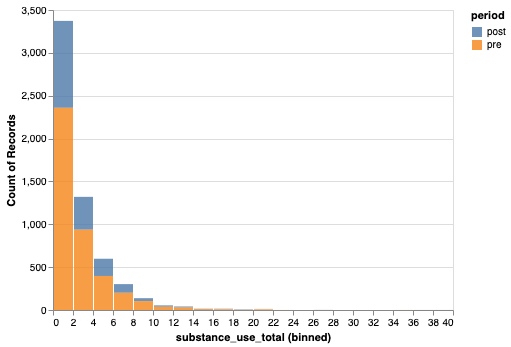

In [12]:
alt.Chart(addiction_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

In [13]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(addiction_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(addiction_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 4099
Number of unique authors (posters) in 'post' dataset: 1783


We see that there are more unique authors posting in this subreddit post pandemic. It's quite interesting to see that even though there are fewer authors in the 'post' dataset, the `substance_use_total` is much higher. 
From looking at the means, we find that the post dataset is higher with an average of 2.14 in comparison to the pre dataset which is 2.04. 